# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv', header=0)
df.columns
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

y = np.array(df['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# kNN

In [ ]:
#Using the Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

n_neighbors = 10
steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
print(accuracy_score(y_pipe, y_test))

0.7402597402597403


We can see the accuracy of this model is 74.03%

In [ ]:
# Using GridSearchCV model to choose one k value be used in our model
from sklearn.model_selection import GridSearchCV, cross_val_score
n_list = list(range(1, 101))
parameters = dict(knn__n_neighbors=n_list)
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)
print(clf.best_estimator_.get_params()["knn__n_neighbors"])

15


In [ ]:
cv_scores = cross_val_score(clf.best_estimator_, X, y, cv=5)
print(np.mean(cv_scores))

0.7630846277905101


From this result, in this case the best k is 7. The corresponding cross-validation score is 73.98%

# Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'min_samples_split': list(range(2, 5)),
          'max_leaf_nodes': list(range(2, 50))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                              params, verbose=1, cv=3)
#Use grid search find the best min sample split and max leaf nodes
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score

clf = grid_search_cv.best_estimator_
#Put the best parameter in clf model
print(grid_search_cv.best_params_)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)
#calculate the accuracy rate about this model

{'max_leaf_nodes': 7, 'min_samples_split': 2}


0.7987012987012987

Now you can see that for this plants dataset, the best decision tree should have at most 7 leaf nodes and the minimum number of samples required to be at a leaft node is 2. The fitted decision tree can get 79.87% accuracy on the test set.

<function matplotlib.pyplot.show(*args, **kw)>

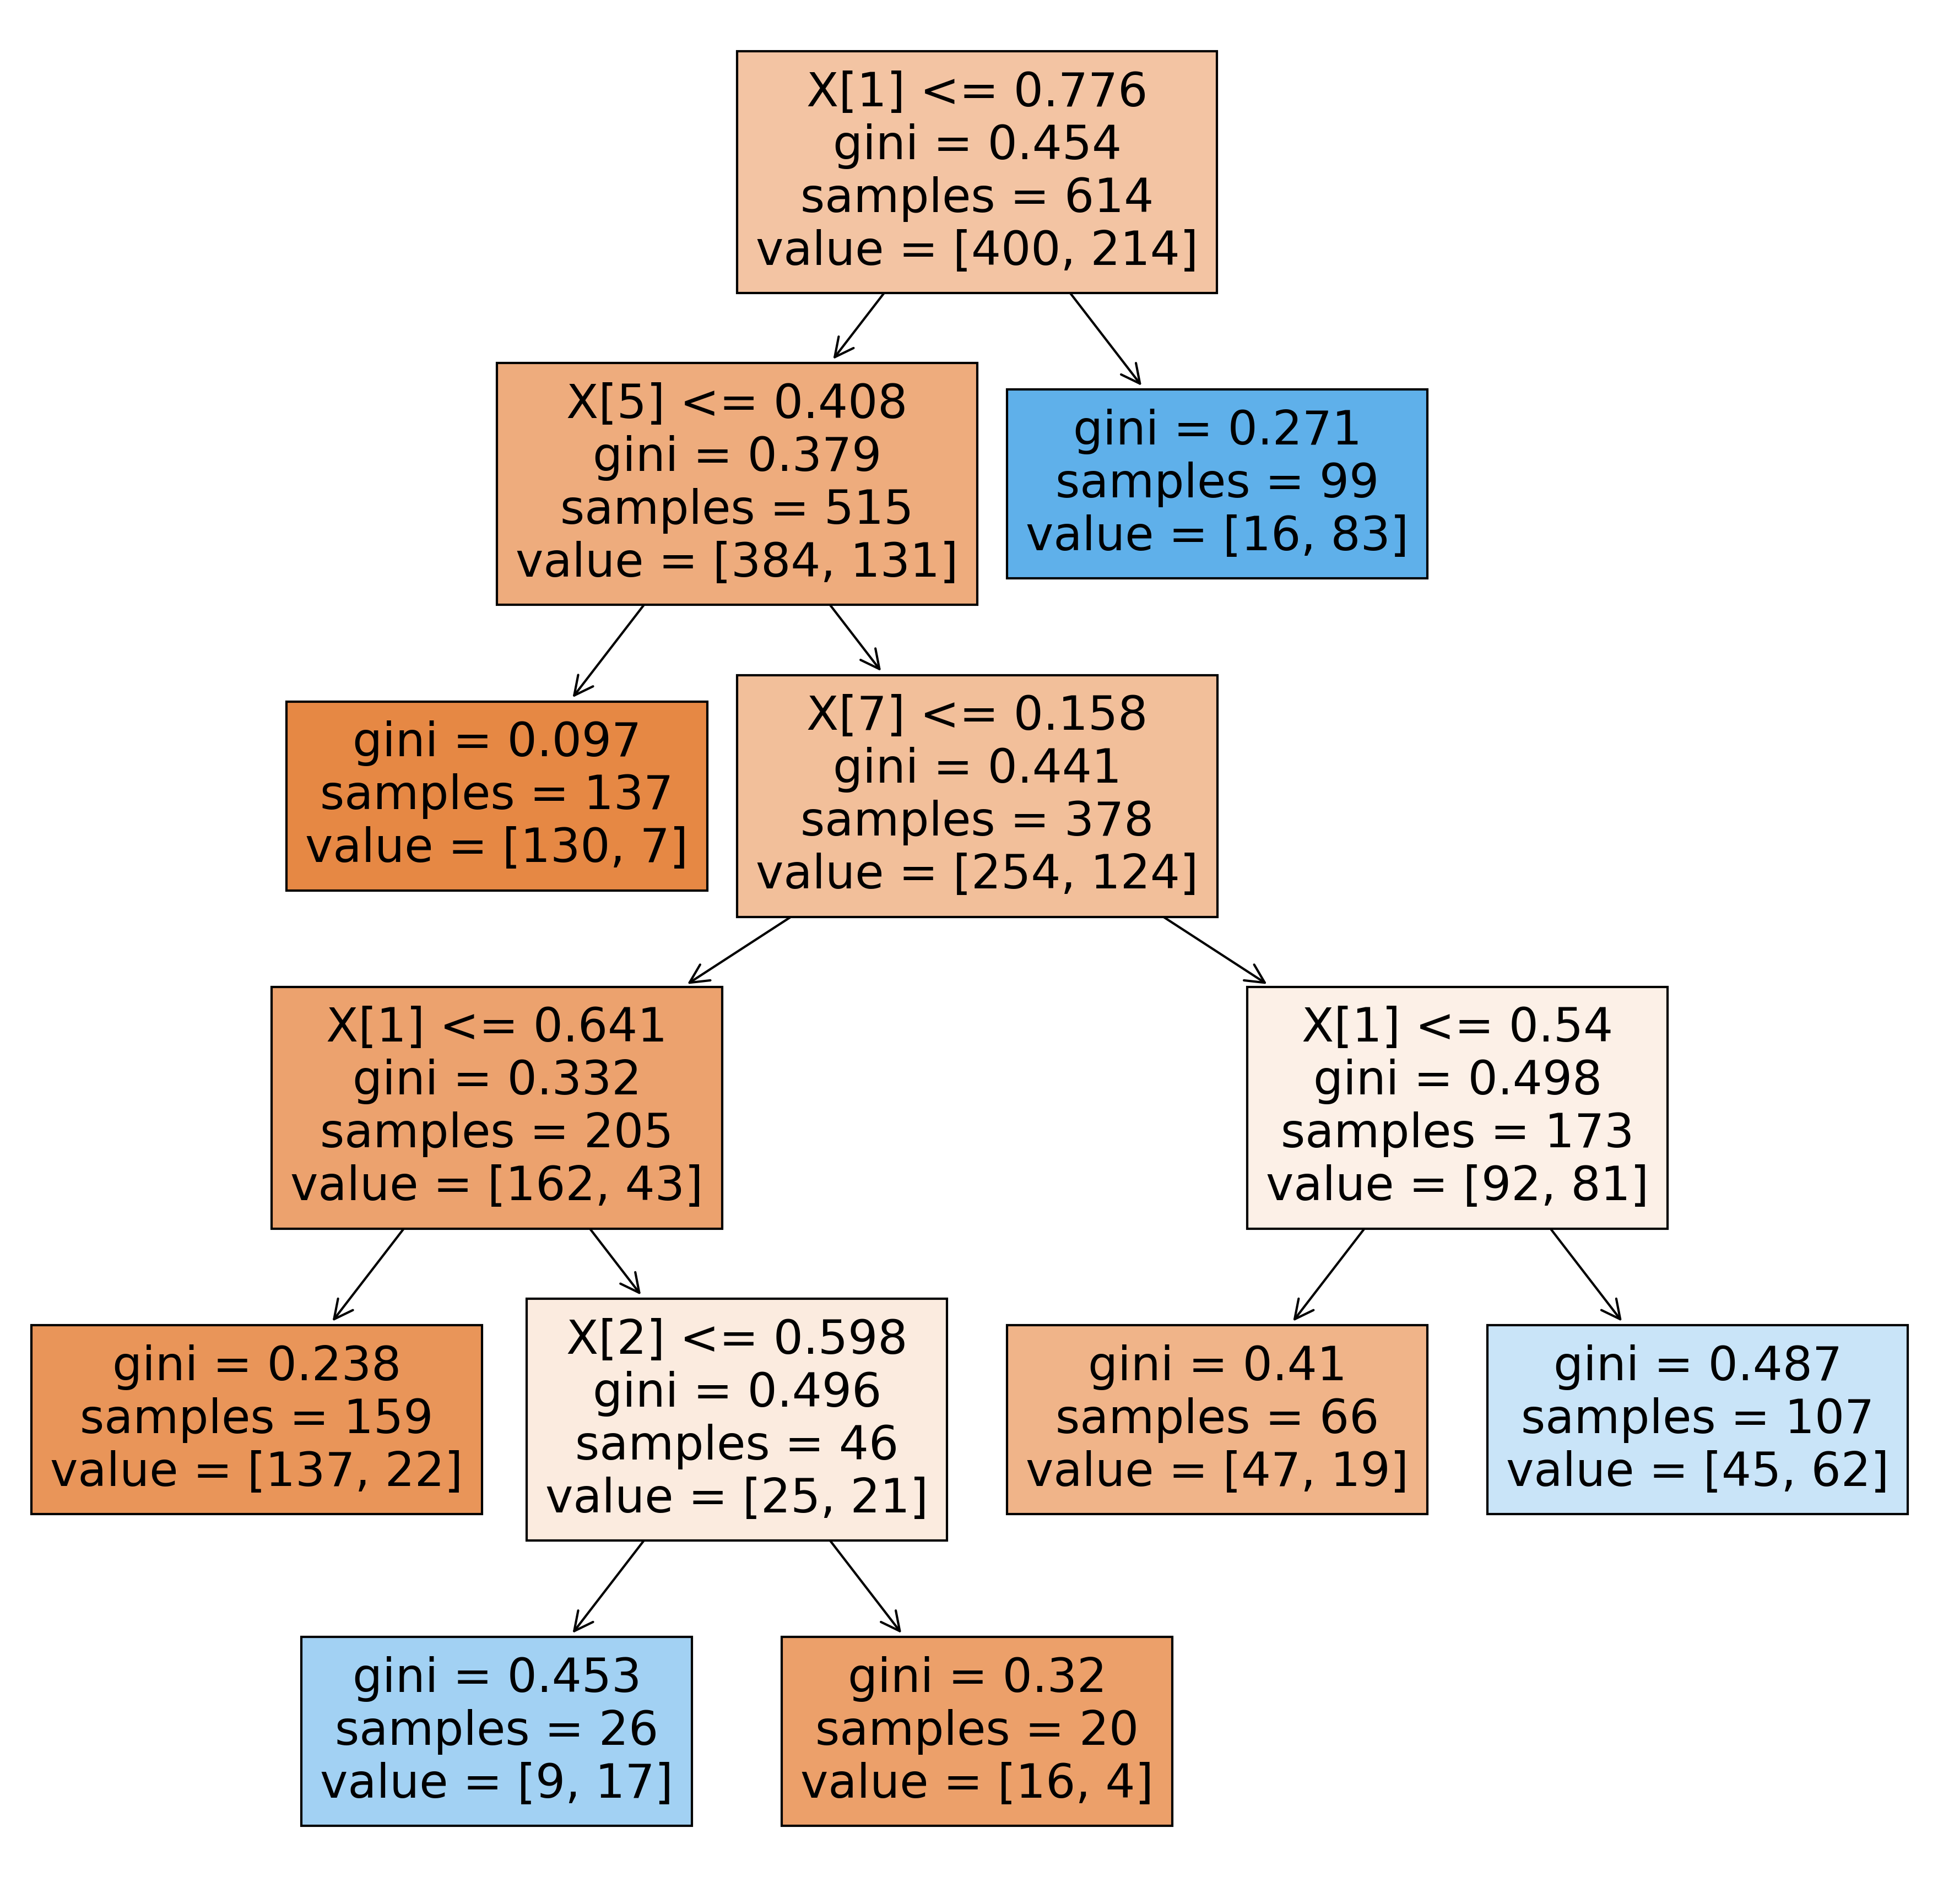

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15), dpi=300)
tree.plot_tree(clf, filled=True)
plt.show

In [ ]:
cv_scores = cross_val_score(clf, X, y, cv=5)
print(np.mean(cv_scores))

0.733138103726339


The cv score of decision tree iss 73.31%.



# Random Forest(contain Q7 find the two importance features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {'min_samples_split': list(range(2, 5)),
          'max_leaf_nodes': list(range(2, 50))}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), 
                              params, verbose=1, cv=3)
#Use grid search find the best min sample split and max leaf nodes
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score

clf = grid_search_cv.best_estimator_
#Put the best parameter in clf model
print(grid_search_cv.best_params_)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)
#calculate the accuracy rate about this model

{'max_leaf_nodes': 19, 'min_samples_split': 2}


0.7467532467532467

The accuracy of Random Forest model is 74.68%

Feature: 0, Score:0.077795
Feature: 1, Score:0.368451
Feature: 2, Score:0.054454
Feature: 3, Score:0.044985
Feature: 4, Score:0.070088
Feature: 5, Score:0.173729
Feature: 6, Score:0.093930
Feature: 7, Score:0.116567


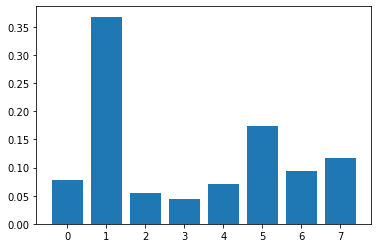

In [ ]:
importance = clf.feature_importances_
for i, V in enumerate(importance):
  print('Feature: %0d, Score:%5f' % (i,V))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We can see the feature 1 and feature 5 are the most importance features.

In [ ]:
cv_scores = cross_val_score(clf, X, y, cv=5)
print(np.mean(cv_scores))

0.7696205755029284


The cv score is 76.96%

# Ada Boost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7597402597402597

In [ ]:
cv_scores = cross_val_score(clf, X, y, cv=5)
print(np.mean(cv_scores))

0.7695781342840167


the cv score is 76.96%

# Logistic Regression(keras)

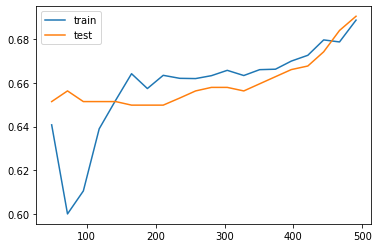

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [ ]:
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/500
39/39 [==============================] - 1s 6ms/step - loss: 0.7202 - accuracy: 0.4251 - val_loss: 0.7209 - val_accuracy: 0.4416
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 0.7123 - accuracy: 0.4870 - val_loss: 0.7151 - val_accuracy: 0.4805
Epoch 3/500
39/39 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.5505 - val_loss: 0.7104 - val_accuracy: 0.5390
Epoch 4/500
39/39 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.6075 - val_loss: 0.7064 - val_accuracy: 0.5584
Epoch 5/500
39/39 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.6173 - val_loss: 0.7034 - val_accuracy: 0.6104
Epoch 6/500
39/39 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.6384 - val_loss: 0.7014 - val_accuracy: 0.6169
Epoch 7/500
39/39 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.6368 - val_loss: 0.6992 - val_accuracy: 0.6234
Epoch 8/500
3

In [ ]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7273


[0.5280418395996094, 0.7272727489471436]

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

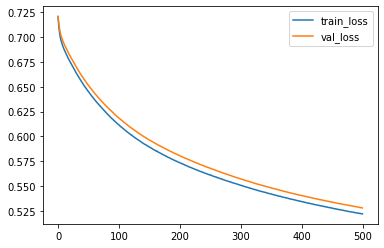

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()
plt.show()

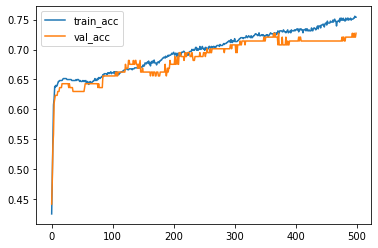

In [ ]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()
plt.show()

The accuracy score is 72.73%. I used 500 epochs and 16 batch sizes. Totally we can see the chart display a little underfitting, I think we need more data to fit the model.

## sklearn and cv score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', LogisticRegression())]

log_reg = Pipeline(steps=steps)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7337662337662337

In [ ]:
cv_score = cross_val_score(log_reg, X,y,cv=5)
np.mean(cv_score)

0.7695696460402343

# Nerual Network(with Q8 drawing learning curve)

In [ ]:
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=1)

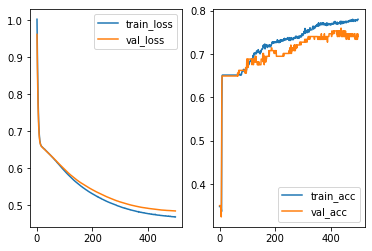

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

In [ ]:
from tensorflow.keras import regularizers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=1)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']


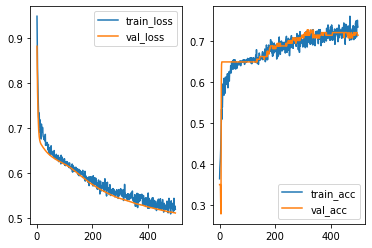

In [ ]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

In [ ]:
from tensorflow.keras import regularizers
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=500, batch_size=30, validation_data=(X_test, y_test), verbose=1)

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']


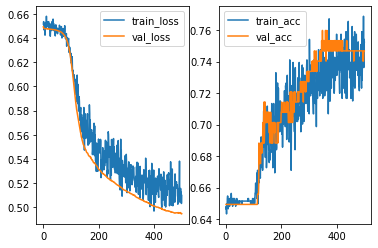

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].plot(loss_train, label='train_loss')
ax[0].plot(loss_val, label='val_loss')
ax[0].legend()

ax[1].plot(acc_train, label='train_acc')
ax[1].plot(acc_val, label='val_acc')
ax[1].legend()

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 10)                90        
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_40 (Dense)            (None, 1)               

At fist nerual model is a little bit over fitting, than I used regularize to fix it. Look the chart we can see it still a little under fitting, then I may add more layers to make the model more complicated in order to capture more information. In generly, this model still need more information to fit the data. Beacuse it looks a little bias. 